# Magma Dynamics Practical 5: Modelling Melt Flow in the Crust
## John Maclennan, February 2021


## Magma Flow Rates

It is clear that magma flow in the upper crust is dominated by transport in open conduits. Dikes and sills with sharp margins provide pathways for crystal-poor magma as it rises towards the surface for eruption. John Rudge's part of the course will have demonstrated the importance of porous flow of melt in the mantle. Therefore, somewhere between melt generation and eruption, the mode of melt transport has to shift from porous intergranular to open flow. A major question in magma dynamics is therefore to establish the place where this transition occurs. The different physical mechanisms produce different physical properties of the flow that, as we shall see, may be recorded in geochemical observations. In this practical we shall examine rates of melt flow associated with different mechanisms.   

## Flow in Dikes
### Poiseuille Flow
It is often assumed that flow of magma in dikes can be modelled with plane Poiseuille flow - laminar flow with no-slip boundaries on the walls. With a dike width of $A$, and distance across the dike being $x$. In Poiseuille flow the motion is governed by a pressure gradient along the direction $z$. In the simplest case, we can understand this as the difference between the magmastatic pressure gradient and the lithostatic gradient in the host rock. Therefore, the upwards vertical velocity of the melt is given as 

$v_z = \frac{\Delta\rho g x(A-x)}{2 \mu}$

with $\Delta\rho$ being the density contrast and $\mu$ magma viscosity. Can you tell from the units whether this viscosity is the dynamic or kinematic viscosity?  

**Q1) Where in the dike will the peak $v_z$ be found?**

A1) The viscosity is dynamic and its units are Pa s. The peak velocity is found at $A/2$, half way across the dike. You can obtain this answer from physical reasoning or by finding the maximum of the function.  

**Q2) Can you write out the expression for this peak flow velocity?**

A2) $v_{max} = \frac{\Delta\rho g A^{2}}{8 \mu}$


The total volumetric flux for unit length along strike of a dike is given by

$Q = \frac{\Delta\rho g A^3}{12 \mu}$

### Mid-Crustal Intrusion under Iceland
An earthquake swarm under the Icelandic Northern Rift Zone at 15-18 km depth was observed by [White et al (2011)](https://www.sciencedirect.com/science/article/pii/S0012821X11001178?via%3Dihub). The earthquakes associated with this Upptypingar event showed a vertical propagation rate of 2-3 metres *per minute*. If this rate reflects the rate of movement of melt in a conduit, then it is possible to use this result to estimate the width of the conduit. 

**Q3) Estimate the width of the intrusion.**
Edit the chunk of code below to make a labelled plot which can be used to estimate the intrusion width. You can also answer the question by rearranging the equations - but this is good stretching exercise for plotting in Python. You will need to change the variables, recognise the function, and change the plot appearance. Hints can be found on matplotlib examples pages. 

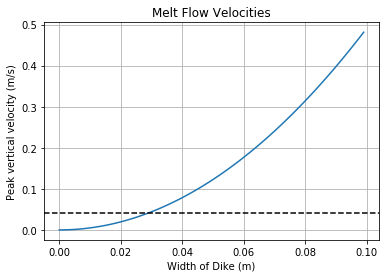

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
rho_m = 2700 # kg m-3 - value from Hartley & Maclennan 2018 for Icelandic basalts
rho_s = 2900 # kg m-3 - density from Darbyshire and other seismic/gravity studies 
delr = rho_s - rho_m # kg m-3 - density difference between magma and host rock - you can change this to be something sensible.
g = 9.82 # m s-2 - gravitational acceleration (I defaulted it to the Moon)
mu = 5 # Pa s - from Hartley (dynamic viscosty - answer to Q above!)
A = np.arange(0.0, 0.1, 0.001) # Range of dike widths at which we need to evaluate the function
vz = delr*g*A*A/(8.*mu) # peak upwelling velocity - equation is answer to previous question. 

# show horizontal line for observed EQ swarm propogation rates
ve = 2.5/60. # conversion from metres pre minute to metres per second

fig, ax = plt.subplots()
ax.plot(A, vz)
l1=plt.axhline(ve,color='black',ls='--')

ax.set(xlabel='Width of Dike (m)', ylabel='Peak vertical velocity (m/s)',
       title='Melt Flow Velocities')
ax.grid()

#fig.savefig("test.png")
plt.show()

A3) With plausible figures we find that the vertical transit rate implised by the earthquake swarms can be matched by extremely narrow conduits - about 3 cm across! Perhaps the physical situation is not realistic and the force balance involved in calculating the flow velocities is too simplistic. Alternatively, the propagation rate from the seismicity might not be directly tracking vertical magma flow. 

**Q4) How long will it take to freeze this intrusion?**
Add a new code cell below and write some expressions to work out the answer. 

Start with $t_c = \frac{a^{2}}{\pi^{2} \kappa}$ 

In [15]:
# Use a conductive cooling time as a starting estimate

aa = 0.03
kappa = 1.E-06 # m2 s-1 thermal diffusivity
tc = np.divide(np.power(aa,2),(np.power(np.pi,2)*kappa)) # s  
tc

91.189065278104

A4) A very short time, of less than 2 minutes, would be required to freeze this intrusion. The conductive cooling time is short, and also tends to be an overestimate of the timescale required for the amount of conductive cooling required to reach the solidus. However, this calculation is extremely simplified and misses out many features, including the latent heat of crystallisation of the material in place and also that sustained flow of magma into the conduit may maintain a liquid centre to the conduit. The calculation could be reposed in terms of a heat balance in order to investigate further. 

Given your knowledge of upper-crustal dikes, and the observations reported by [White et al (2011)](https://www.sciencedirect.com/science/article/pii/S0012821X11001178?via%3Dihub), it is possible to estimate the timescales of magma transport through the crust.

**Q5) What is the transport time in for magma rising in dikes from the Icelandic Moho to the surface for eruption?**

In [17]:
h_c = 20000 # m Moho depth under northern Iceland (Krafla volcanic system)
v_m = np.divide(2.5,60) # m s-1 earthquake swarm estimates (Compare with Mutch et al - discussed later in course)

t_t = np.divide(h_c,v_m) # rise time in seconds
spd = 60.*60.*24.
t_d = np.divide(t_t,spd) # rise time in days

t_d

5.555555555555555

A5) Make a cell above to do some calculations. What are the uncertainties in your calculations? 
If the EQ swarm rates do reflect rates of melt transport, then melt may transit the crust in a matter of days. These numbers are consistent with petrology and diffusion chronometry - as we shall see later in the course. It is also necessary to consider that melt rise velocities may vary within the crust, and that the rise may be staged with substantial periods of storage prior to further rise. 


### Overpressure in the Chamber
Before melt rises to the surface in an open intrusion, it may be stored in a chamber. If the walls of the chamber behave like an elastic/brittle material then the initial tensile failure of the country rock is driven by magmatic overpressure in the chamber. [Kelemen and Aharonov, 1998](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/GM106p0267) and [Hartley and Maclennan (2018)](https://www.frontiersin.org/articles/10.3389/feart.2018.00029/full). The overpressure required for failure is not well constrained, but is thought to lie between 1 and 10 MPa. 

**Q6) Does overpressure in the magma chamber play an important role in determining the magma flow velocity in the dike?** 

In [18]:
# Write some equations in here to work it the answer to Q6
# overpressure associated with height of dike
h = 20000 # m dike height
Pd = np.divide(delr*g*h,1E06) # pressure drive due to density differences in dike
Pd

39.28

A6) Answer - It is unlikely that this overpressure from the chamber has a large role in controlling the peak flow velocities in the dike. This is because the pressure related to the density difference between magma and host rock in the dike itself is likely to be larger than the overpressure in the chamber. However, this overpressure may be important in the initial ascent from the chamber, as the dike grows in height. Also, it make help to drive magma past its level of neutral bouyancy in nature.

## Porous Flow in the Lower Crust
### Estimates of Porous Flow Velocities

Expressions from [McKenzie (1985)](https://www.sciencedirect.com/science/article/pii/0012821X85901682?via%3Dihub) were adapted by [Sparks et al (2019)](https://royalsocietypublishing.org/doi/10.1098/rsta.2018.0019) to estimate the porous flow velocity driven by compaction for various melts.

$w_0 = \frac{k_{\phi}(1 - \phi)\Delta\rho g}{\mu \phi}$ 

You've seen this equation in a practical quite recently. Can you remember where?

**Q7) Use the parameter values from Sparks et al. (2019) or elsewhere to estimate the flow rates for basalt driven by compaction** 

/Users/kathrynfaulkner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


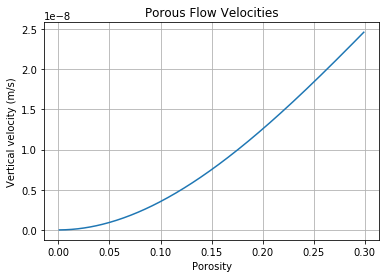

In [20]:
# Write some equations in here to work it the answer to Q7
# You could also make a plot to show the influence of porosity on velocity

phi = np.arange(0,0.3,0.001) # range of porosities of interest
ac = 0.001 # m grain radius 
k_p = np.power(ac,2.)*np.power(phi,3.)*0.001 # permeability from McKenzie 1985

w_0 = np.divide(k_p*(1.-phi)*delr*g,mu*phi) # prorous flow velocity

fig, ax = plt.subplots()
ax.plot(phi, w_0)

ax.set(xlabel='Porosity', ylabel='Vertical velocity (m/s)',
       title='Porous Flow Velocities')
ax.grid()

#fig.savefig("test.png")
plt.show()



A7) These velocities are extremely slow. 

**Q8) How long would it take basaltic melt to rise through the Icelandic crust by compaction-driven porous flow? Compare this with the transit time in an open conduit that was obtained from Q5. How might this finding be used to test models of transcrustal magmatism?**

In [22]:
# Write some equations in here to work it the answer to Q8
phi_set = 0.1 # set porosity to 10%
ac = 0.001 # m grain radius 
k_p_set = np.power(ac,2.)*np.power(phi_set,3.)*0.001 # permeability from McKenzie 1985

w_0_set = np.divide(k_p_set*(1.-phi_set)*delr*g,mu*phi_set) # prorous flow velocity

t_t = np.divide(h_c,w_0_set) # rise time in seconds
spd = 60.*60.*24.
t_d = np.divide(t_t,spd) # rise time in days
t_yr = np.divide(t_d, 365.25)
t_yr # rise time in years


179271.82515291317

A8) Answer - Almost 100 kyr - which is not consistent with observations. At first glance, this may rule out porous slow as main mode of transit of melt through the crust. However, [Sparks et al (2019)](https://royalsocietypublishing.org/doi/10.1098/rsta.2018.0019) mentions some studies where mechanisms of generating focussed flow through mushes may increase the vertical flow velocities. 

### Consequences of Porous Flow Through Cumulates: Minor Element Chromatography 

In a very interesting paper, [Korenaga and Kelemen (1998)](https://www.sciencedirect.com/science/article/pii/S0012821X98000041) explored the geochemical imprint of vertical porous flow of basalt through layered mafic cumulates (gabbros from the lower crust in the Oman ophiolite). They did not specifically examine compaction-driven flow, but set up a flux-balance to estimate melt velocities. They examined the behaviour of elements with different solid-melt partition coefficients during porous flow. Elements that have a high partition coefficient in the solid will dominantly reside in the solid and their concentration profiles in are not altered by the melt flow. Conversely, elements with low partition cofficients will have their vertical concentration profiles in the cumulates shifted by the flow. This is analogous to chromatography.

Under the assumption of local equilibrium for solid and melt, the advection velocity of the concentration of a chemical element is provided by

$w_e = F w_0$

with

$F = \left[\frac{1 - \phi}{\phi} \frac{\rho_s}{\rho_f} K + 1 \right]^{-1}$.

In this case, $K$ is the solid-melt partition coefficient for the element.

First of all, by inspection of the equation, make sure that you can see how the relationship between fluid flow velocity and element translation velocity changes as a function of partition coefficient (e.g. take extreme cases). 

Figure 1 of [Korenaga and Kelemen (1998)](https://www.sciencedirect.com/science/article/pii/S0012821X98000041) shows that individual layers in the Oman lower gabbros preserve centimetre-scale correlations between sets of trace elements, such as Ni and Mn in olivine. These correlations form during fractional crystallisation of the melt in metre-scale sills. 

**Q9) Plot the advection distance for Ni (K=5) and Mn (K=0.5) as a function of time during porous flow (it might be worth exploring a log scale.**

A9) Insert plot here



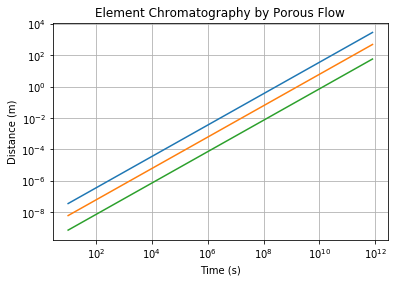

In [28]:
log10t = np.arange(1,12,0.1) # range of times of interest
t = np.power(10.,log10t)
w = w_0_set # take flow velocity and porosity from the previous calculation at fixed porosity
phi_c = phi_set
K_Ni = 5.0
K_Mn = 0.5

F_Ni = np.divide(1.,1.+np.divide(1.-phi_c,phi_c)*np.divide(rho_s,rho_m)*K_Ni)
F_Mn = np.divide(1.,1.+np.divide(1.-phi_c,phi_c)*np.divide(rho_s,rho_m)*K_Mn)

w_Ni = w*F_Ni
w_Mn = w*F_Mn

z_f = w*t
z_Ni = w_Ni*t
z_Mn = w_Mn*t

fig, ax = plt.subplots()
ax.loglog(t, z_f)
plt.loglog(t,z_Mn)
plt.loglog(t,z_Ni)

ax.set(xlabel='Time (s)', ylabel='Distance (m)',
       title='Element Chromatography by Porous Flow')
ax.grid()

#fig.savefig("test.png")
plt.show()


**Q10) Speculate on the significance of this result for the evaluation of the role of porous flow in the lower crust**

A10) We can see that after about a year of flow (in this case) the fluid has moved about 10 cm, the Mn profile will have been shifted by about a cm and the Ni will have moved a millimetre. This means that any original correlation between Ni and Mn in the mm-scale in the cumulates will have been effectively overprinted and the correlation will have been lost. Ths fact that the rocks appear to preserve spatial correlation in elements with varying partition coefficients indicates that extenise and pervasive porous flow cannot have happened. 

Read [Korenaga and Kelemen (1998)](https://www.sciencedirect.com/science/article/pii/S0012821X98000041) for the details!


